In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import utils
%matplotlib inline

In [149]:
def plotData(X, y, preds=None,draw_line=False):
    fig = plt.figure()
    plt.plot(X[y==1, 0], X[y==1, 1], 'k*', lw=2, ms=10)
    plt.plot(X[y==0,0], X[y==0, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    if draw_line:
        x = np.linspace(0,200,100)
        plt.plot(x,preds)
    plt.show()

In [150]:
data1 = np.loadtxt("./data/data1.txt", delimiter=",")
data2 = np.loadtxt("./data/data2.txt", delimiter=",")

In [154]:
class LogisticRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.parameters = None
        self.cost_history = []
        self.mu = None
        self.sigma = None
    
    def sigmoid(self, x):
        z = np.array(x)
    
        g = np.zeros(z.shape)

        g = 1/(1 + np.exp(-z) ) 

        return g

    def calculate_cost(self):
        """
        Returns the cost and gradients.
        parameters: None
        
        Returns:
            cost : Caculated loss (scalar).
            gradients: array containing the gradients w.r.t each parameter

        """

        m = self.X.shape[0]

        z = np.dot(self.X, self.parameters)
        z = z.reshape(-1)
        z = z.astype(np.float128, copy=False)
        y_hat = self.sigmoid(z)
        # print(np.sum(y_hat))
        cost = -1 * np.mean(self.Y*(np.log(y_hat)) + (1-self.Y)*(np.log(1-y_hat)))

        gradients = np.zeros(self.X.shape[1])

        # error = y_hat - self.Y

        # for i in range(self.X.shape[1]):
        #     gradients[i] = np.mean(error * self.X[:,i])

        for n in range(len(self.parameters)):
            temp = np.mean((y_hat-self.Y)*self.X[:,n])
            gradients[n] = temp

        # gradients = np.dot(self.X.T, error)/m

        return cost, gradients


    def init_parameters(self):
        """
        Initialize the parameters as array of 0s
        parameters: None
        
        Returns:None

        """
        self.parameters = np.zeros((self.X.shape[1],1))


    def feature_normalize(self, X):
        """
        Normalize the samples.
        parameters: 
            X : input/feature matrix
        
        Returns:
            X_norm : Normalized X.

        """
        X_norm = X.copy()
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)

        self.mu = mu
        self.sigma = sigma

        for n in range(X.shape[1]):
            X_norm[:,n] = (X_norm[:,n] - mu[n]) / sigma[n]
        return X_norm

    def fit(self, x, y, learning_rate=0.01, epochs=500, is_normalize=True, verbose=0):
        """
        Iterates and find the optimal parameters for input dataset
        parameters: 
            x : input/feature matrix
            y : target matrix
            learning_rate: between 0 and 1 (default is 0.01)
            epochs: number of iterations (default is 500)
            is_normalize: boolean, for normalizing features (default is True)
            verbose: iterations after to print cost
        
        Returns:
            parameters : Array of optimal value of weights.

        """
        self.X = x
        self.Y = y
        self.cost_history = []
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)
            is_normalize = False
        if is_normalize:
            self.X = self.feature_normalize(self.X)
        self.X = np.concatenate([np.ones((self.X.shape[0],1)), self.X], axis=1)
        print(self.X.shape)
        self.init_parameters()

        for i in range(epochs):
            cost, gradients = self.calculate_cost()
            self.cost_history.append(cost)
            self.parameters -= learning_rate * gradients.reshape(-1,1)

            if verbose:
                if not (i % verbose):
                    print(f"Cost after {i} epochs: {cost}")
        return self.parameters


    def predict(self,x, is_normalize=True):
        """
        Returns the predictions after fitting.
        parameters: 
            x : input/feature matrix
        
        Returns:
            predictions : Array of predicted target values.

        """
        x = np.array(x, dtype=np.float64) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        if is_normalize:
            for n in range(x.shape[1]):
                x[:,n] = (x[:,n] - self.mu[n]) / self.sigma[n]
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return [1 if i > 0.5 else 0  for i in self.sigmoid(np.dot(x,self.parameters))]

In [155]:
model = LogisticRegression()

In [156]:
X = data2[:,:2]
Y = data2[:,2]
print(X.shape, Y.shape)

(118, 2) (118,)


In [157]:
X = utils.mapFeature(X[:,0],X[:,1])
X.shape

(118, 28)

In [170]:
params = model.fit(X[:,1:],Y, epochs=10000, is_normalize=False)

(118, 28)


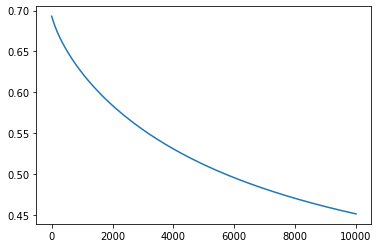

In [171]:
plt.plot(np.array(list(range(10000))), model.cost_history)

In [172]:
preds = model.predict(X[:,1:], is_normalize=False)
sum(preds == Y)/len(Y)

0.8305084745762712

/Users/swayam/Desktop/demystifying_machine_learning/logistic_regression/utils.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(out)


<function matplotlib.pyplot.show(close=None, block=None)>

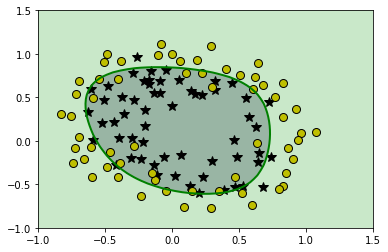

In [173]:
# make sure theta is a numpy array
from matplotlib import pyplot

theta = params
y = Y.copy()

# Plot Data (remember first column in X is the intercept)
# plotData(X[:, 1:3], y)
if X.shape[1] <= 3: 
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
    plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
    fig = pyplot.figure()
    pyplot.plot(X[:, 1:3][y==1, 0], X[:, 1:3][y==1, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[:, 1:3][y==0,0], X[:, 1:3][y==0, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    pyplot.plot(plot_x, plot_y)

        # Legend, specific for the exercise
    pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
    pyplot.xlim([30, 100])
    pyplot.ylim([30, 100])

else:
        # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i, j] = np.dot(utils.mapFeature(ui, vj), theta)

    z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
    fig = pyplot.figure()
    pyplot.plot(X[:, 1:3][y==1, 0], X[:, 1:3][y==1, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[:, 1:3][y==0,0], X[:, 1:3][y==0, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

pyplot.show

In [161]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    """

    z = np.array(z)
    
    g = np.zeros(z.shape)

    g = 1/(1 + np.exp(-z))    

    return g

In [162]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    """
    m = y.size  # number of training examples

    J = 0
    grad = np.zeros(theta.shape)

    
    z = theta.dot(X.T)
    h_x = sigmoid(z) # calculating hypothesis (h(x))
    J = -1 * np.mean(y*(np.log(h_x)) + (1-y)*(np.log(1-h_x)))

    for n in range(len(theta)):
        temp = np.mean((h_x-y)*X[:,n])
        grad[n] = temp
    
    return J, grad

In [163]:

options= {'maxiter': 400}
initial_theta = np.zeros(X.shape[1])
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, Y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun

theta = res.x

print('theta:')
print(theta)

theta:
[  10.92027345   14.41391834    7.88894898 -110.40678327  -60.42008079
  -37.95687737 -114.01965814 -111.99006425  -53.43041923   -1.52249018
  394.07166451  365.76145912  440.85613847  196.55506339   39.68952515
  206.07889741  326.45600885  367.58929579  219.80400101   66.69281066
   -3.45105098 -468.76307498 -640.56432545 -905.67014421 -687.59858489
 -602.68613342 -237.83544253  -23.43941239]


## Regularized Logistic Regression

In [164]:
class RegLogisticRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.parameters = None
        self.cost_history = []
        self.mu = None
        self.sigma = None
    
    def sigmoid(self, x):
        z = np.array(x)
    
        g = np.zeros(z.shape)

        g = 1/(1 + np.exp(-z) ) 

        return g

    def sigmoid_derivative(self, x):
        derivative = self.sigmoid(x) * (1 - self.sigmoid(x))
        return derivative

    def calculate_cost(self, lambda_):
        """
        Returns the cost and gradients.
        parameters: None
        
        Returns:
            cost : Caculated loss (scalar).
            gradients: array containing the gradients w.r.t each parameter

        """

        m = self.X.shape[0]

        z = np.dot(self.X, self.parameters)
        z = z.reshape(-1)
        z = z.astype(np.float128, copy=False)
        y_hat = self.sigmoid(z)
        cost = -1 * np.mean(self.Y*(np.log(y_hat)) + (1-self.Y)*(np.log(1-y_hat))) + lambda_ * (np.sum(self.parameters[1:]**2))/(2*m)

        gradients = np.zeros(self.X.shape[1])

        for n in range(len(self.parameters)):
            if n == 0:
                temp = np.mean((y_hat-self.Y)*self.X[:,n])
            else:
                temp = np.mean((y_hat-self.Y)*self.X[:,n]) + lambda_*self.parameters[n]/m
            gradients[n] = temp

        # gradients = np.dot(self.X.T, error)/m

        return cost, gradients


    def init_parameters(self):
        """
        Initialize the parameters as array of 0s
        parameters: None
        
        Returns:None

        """
        self.parameters = np.zeros((self.X.shape[1],1))


    def feature_normalize(self, X):
        """
        Normalize the samples.
        parameters: 
            X : input/feature matrix
        
        Returns:
            X_norm : Normalized X.

        """
        X_norm = X.copy()
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)

        self.mu = mu
        self.sigma = sigma

        for n in range(X.shape[1]):
            X_norm[:,n] = (X_norm[:,n] - mu[n]) / sigma[n]
        return X_norm

    def fit(self, x, y, learning_rate=0.01, epochs=500, lambda_=0,is_normalize=True, verbose=0):
        """
        Iterates and find the optimal parameters for input dataset
        parameters: 
            x : input/feature matrix
            y : target matrix
            learning_rate: between 0 and 1 (default is 0.01)
            epochs: number of iterations (default is 500)
            is_normalize: boolean, for normalizing features (default is True)
            verbose: iterations after to print cost
        
        Returns:
            parameters : Array of optimal value of weights.

        """
        self.X = x
        self.Y = y
        self.cost_history = []
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)
            is_normalize = False
        if is_normalize:
            self.X = self.feature_normalize(self.X)
        self.X = np.concatenate([np.ones((self.X.shape[0],1)), self.X], axis=1)
        print(self.X.shape)
        self.init_parameters()

        for i in range(epochs):
            cost, gradients = self.calculate_cost(lambda_=lambda_)
            self.cost_history.append(cost)
            self.parameters -= learning_rate * gradients.reshape(-1,1)

            if verbose:
                if not (i % verbose):
                    print(f"Cost after {i} epochs: {cost}")
        return self.parameters


    def predict(self,x, is_normalize=True):
        """
        Returns the predictions after fitting.
        parameters: 
            x : input/feature matrix
        
        Returns:
            predictions : Array of predicted target values.

        """
        x = np.array(x, dtype=np.float64) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        if is_normalize:
            for n in range(x.shape[1]):
                x[:,n] = (x[:,n] - self.mu[n]) / self.sigma[n]
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return [1 if i > 0.5 else 0  for i in self.sigmoid(np.dot(x,self.parameters))]

In [165]:
model2 = RegLogisticRegression()

In [167]:
params1 = model2.fit(X[:,1:],Y,epochs=10000, lambda_=1,is_normalize=False)

(118, 28)


In [168]:
preds = model2.predict(X[:,1:], is_normalize=False)
sum(preds == Y)/len(Y)

0.8305084745762712

/Users/swayam/Desktop/demystifying_machine_learning/logistic_regression/utils.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(out)


<function matplotlib.pyplot.show(close=None, block=None)>

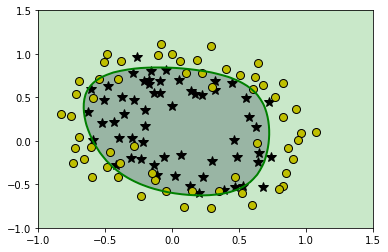

In [169]:
# make sure theta is a numpy array
from matplotlib import pyplot

theta = params1
y = Y.copy()

# Plot Data (remember first column in X is the intercept)
# plotData(X[:, 1:3], y)
if X.shape[1] <= 3: 
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
    plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
    fig = pyplot.figure()
    pyplot.plot(X[:, 1:3][y==1, 0], X[:, 1:3][y==1, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[:, 1:3][y==0,0], X[:, 1:3][y==0, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    pyplot.plot(plot_x, plot_y)

        # Legend, specific for the exercise
    pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
    pyplot.xlim([30, 100])
    pyplot.ylim([30, 100])

else:
        # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i, j] = np.dot(utils.mapFeature(ui, vj), theta)

    z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
    fig = pyplot.figure()
    pyplot.plot(X[:, 1:3][y==1, 0], X[:, 1:3][y==1, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[:, 1:3][y==0,0], X[:, 1:3][y==0, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

pyplot.show